# Práticas do livro: Machine Learning: Guia de referência rápida - Matt Harrison

## Capítulo 3 - Descrição da classificação: Conjunto de dados Titanic

### Bibliotecas básicas

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Bibliotecas de modelagem preditiva

In [2]:
from sklearn import ensemble, preprocessing, tree
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold

### Bibliotecas de visualização

In [3]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import LearningCurve

%matplotlib inline

### Carregamento dos dados

In [4]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
orig_df = pd.read_excel(url)
df = orig_df.copy()

### Dicionário dos dados

- pclass: classe do passageiro (1 = primeira, 2 = segunda, 3 = terceira)
- survived: soreviveu (0 = não, 1 = sim)
- name: nome
- sex: sexo
- age: idade
- sibsp: número de irmãos/esposa(o) a bordo
- parch: número de pais e filhos a bordo
- ticket: número da passagem
- fare: preço da passagem
- cabin: cabine
- embarked: local de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton)
- boat: bote de salva-vidas
- body: número de identificação do corpo
- home.dest: lar/destino

### Conferência dos tipo dos dados

In [5]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

### Relatório de perfil

In [6]:
import pandas_profiling

report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report.to_notebook_iframe()

### Visualização das linhas e colunas

In [7]:
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')

Linhas: 1309 | Colunas: 14


### Estatística resumida dos dados

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Valores  nulos

In [9]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Atributos ausentes em cada amostra

In [10]:
df.isnull().sum(axis=1).loc[:10]

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
dtype: int64

### Eliminando algumas colunas

In [11]:
df.drop(['name', 'ticket', 'home.dest', 'boat', 'body', 'cabin'], axis=1, inplace=True)

### Criando colunas dummies

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


### Separação das amostras

In [13]:
y = df.survived
X = df.drop(['survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Imputação dos dados

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[cols])
X_train.loc[:, cols] = imputed

In [16]:
imputed = imputer.transform(X_test[cols])
X_test.loc[:, cols] = imputed

### Normalização dos dados

In [17]:
sca = preprocessing.StandardScaler()

std_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']

X_train.loc[:, std_cols] = sca.fit_transform(X_train[std_cols])
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,0.825248,-0.128878,-0.498616,-0.432553,-0.473599,1.0,0,1
677,0.825248,-0.205639,-0.498616,-0.432553,-0.488120,1.0,0,1
534,-0.363317,-0.751431,-0.498616,-0.432553,-0.145224,0.0,0,1
1174,0.825248,-2.198733,6.897852,1.805972,0.679618,0.0,0,1
864,0.825248,-0.049698,-0.498616,-0.432553,-0.490408,0.0,0,1


In [18]:
X_test.loc[:, std_cols] = sca.transform(X_test[std_cols])
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1148,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1049,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
982,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
808,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
1195,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0


### Modelo base

In [19]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5038167938931297

In [20]:
from sklearn import metrics
print(f'Precisão: {round(metrics.precision_score(y_test, dummy.predict(X_test)), 2)}')

Precisão: 0.4


### Testando várias famílias de algoritmos

In [21]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [23]:
for model in [DummyClassifier, LogisticRegression, DecisionTreeClassifier, 
              KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
    cls = model()
    kfold = KFold(n_splits=10, random_state=42)
    s = cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    print(f'{model.__name__:22} AUC: ' f'{s.mean():.3f} STD: {s.std():.2f}')

DummyClassifier        AUC: 0.497 STD: 0.04
LogisticRegression     AUC: 0.843 STD: 0.03
DecisionTreeClassifier AUC: 0.757 STD: 0.03
KNeighborsClassifier   AUC: 0.829 STD: 0.05
GaussianNB             AUC: 0.818 STD: 0.04
SVC                    AUC: 0.836 STD: 0.05
RandomForestClassifier AUC: 0.847 STD: 0.03
XGBClassifier          AUC: 0.858 STD: 0.03


### Stacking

In [24]:
from mlxtend.classifier import StackingClassifier

clfs = [x() for x in [LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier]]
stack = StackingClassifier(classifiers=clfs, meta_classifier=LogisticRegression())
kfold = KFold(n_splits=10, random_state=42)
s = cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
print(f'{stack.__class__.__name__} AUC: ' f'{s.mean():.3f} STD: {s.std():.2f}')

StackingClassifier AUC: 0.858 STD: 0.03


### Criando um modelo

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print(f'Precisão: {round(metrics.precision_score(y_test, rf.predict(X_test)), 2)}')

Precisão: 0.82


#### Importância dos atributos

In [26]:
for col, val in sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x:x[1], reverse=True):
    print(f'{col:10}{val:10.3f}')

age            0.282
fare           0.269
sex_male       0.236
pclass         0.090
sibsp          0.050
parch          0.042
embarked_S     0.023
embarked_Q     0.008


### Otimizando o modelo

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_features' : [0,4, 'auto'],
    'n_estimators': [15, 200],
    'min_samples_leaf': [1, 0, 1],
    'random_state': [42]
}

cv = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [28]:
rf_best = RandomForestClassifier(max_features= 4, min_samples_leaf= 1, n_estimators= 200, random_state= 42)
rf_best.fit(X_train, y_train)
print(f'Precisão: {round(metrics.precision_score(y_test, rf_best.predict(X_test)), 2)}')

Precisão: 0.8


### Matriz de confusão

Score: 0.7938931297709924


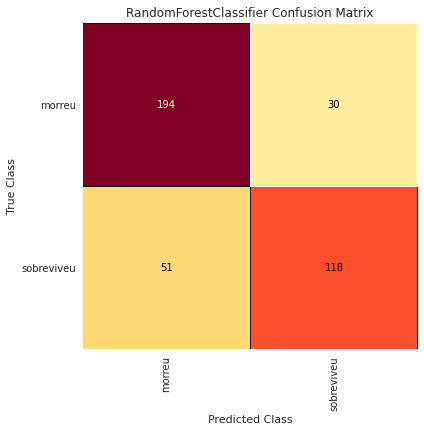

In [29]:
mapping = {0: 'morreu', 1: 'sobreviveu'}
fig, ax = plt.subplots(figsize=(6,6))
cm_viz= ConfusionMatrix(rf_best, classes=['morreu', 'sobreviveu'], label_encoder=mapping)
print(f'Score: {cm_viz.score(X_test, y_test)}')
cm_viz.poof();

### Curva ROC

In [30]:
y_pred = rf_best.predict(X_test)
print(f'ROC: {round(roc_auc_score(y_test, y_pred), 2)}')

ROC: 0.78


Score: 0.85335369228965


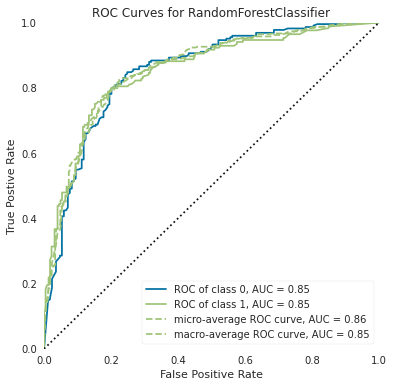

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz= ROCAUC(rf_best)
print(f'Score: {roc_viz.score(X_test, y_test)}')
roc_viz.poof();

### Curva de aprendizado

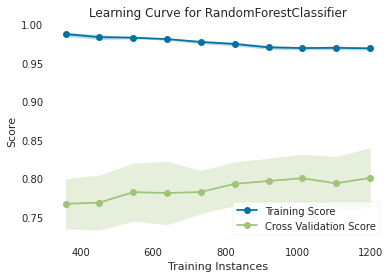

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)

lc_viz = LearningCurve(rf_best, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=4, ax=ax)
lc_viz.fit(X, y)
lc_viz.poof();

### Implante o modelo

#### Salva

In [33]:
import pickle
pic = pickle.dumps(rf_best)

#### Carrega

In [34]:
model = pickle.loads(pic)
y_pred = model.predict(X_test)
print(f'ROC: {round(roc_auc_score(y_test, y_pred), 2)}')

ROC: 0.78


## Capítulo 4 - Dados Ausentes

### Acrescentando colunas informativas para informar que um valor estava ausente

In [35]:
data = orig_df
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
data.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [37]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    return wrapper

df1 = data.assign(cabin_missing=add_indicator('cabin'))

In [38]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## Capítulo 5 - Fazendo uma limpeza nos dados

### Nomes das colunas

In [39]:
import janitor as jn

Xbad = pd.DataFrame({
    'A': [1, None, 3],
    'sales numbers': [20.0, 30.0, None]
})

Xbad

,A,sales numbers
0,1.0,20.0
1,NaN,30.0
2,3.0,NaN


In [40]:
jn.clean_names(Xbad)

,a,sales_numbers
0,1.0,20.0
1,NaN,30.0
2,3.0,NaN


### Verificando se há alguma céula com valor ausente

In [41]:
df.isna().any().any()

True

## Capítulo 6 - Explorando os dados

### Gráfico conjunto

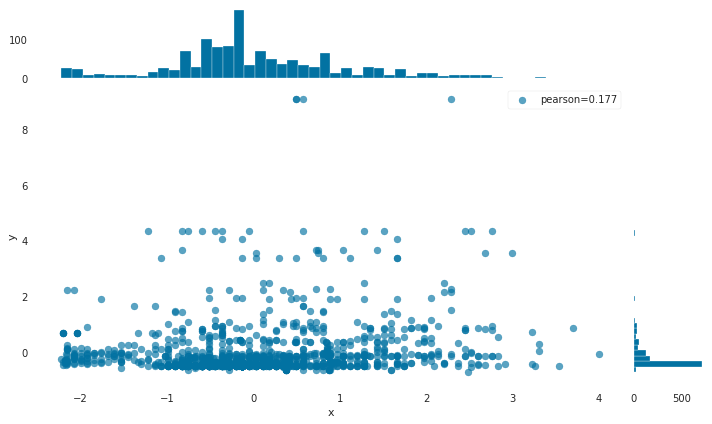

In [44]:
from yellowbrick.features import JointPlotVisualizer

fig, ax = plt.subplots(figsize=(10, 6))
jpv = JointPlotVisualizer(feature='age', target='fare')
jpv.fit(X['age'], X['fare'])
jpv.poof();

### Identificando colunas correlacionadas

In [46]:
def correlated_columns(df, threshold=0.95):
    return df.corr().pipe(lambda df1: pd.DataFrame(np.tril(df1, k=-1), 
                                                   columns=df.columns, 
                                                   index=df.columns)).stack().rename('Pearson').pipe(lambda s:s[s.abs() > threshold
                                                                                                               ].reset_index()).query('level_0 not in level_1')

In [48]:
correlated_columns(X, threshold=0.4)

,level_0,level_1,Pearson
0,age,pclass,-0.440285
1,fare,pclass,-0.558833
2,embarked_S,embarked_Q,-0.489874


### Visualizando o grau de separação entre os alvos

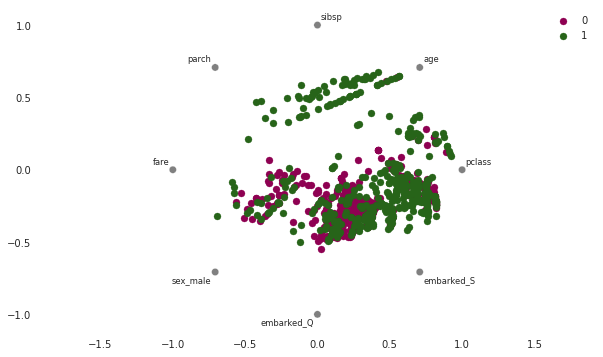

In [52]:
from pandas.plotting import radviz

fig, ax = plt.subplots(figsize=(10,6))
new_df = X.copy()
new_df['target'] = y
radviz(new_df, 'target', ax=ax, colormap='PiYG')
plt.show()